# Mi primer inteligencia artificial

In [1]:
%pip install seaborn  
# Esta línea es una “magic command” de Jupyter que instala la librería seaborn,
# necesaria para la creación de gráficos estadísticos. Se usa en caso de que no esté instalada.

Note: you may need to restart the kernel to use updated packages.


In [2]:

# ------------------------------------------------------------------------------
# Importación de bibliotecas necesarias para análisis de datos y machine learning
# ------------------------------------------------------------------------------

import pandas as pd  
# Pandas se utiliza para manipulación y análisis de datos, permitiendo trabajar con DataFrames.

import numpy as np  
# NumPy proporciona soporte para operaciones numéricas y manejo de arrays multidimensionales.

import matplotlib.pyplot as plt  
# Matplotlib se usa para la generación de gráficos y visualizaciones en 2D.

import seaborn as sns  
# Seaborn es una librería basada en matplotlib que facilita la creación de gráficos estadísticos.

from sklearn.model_selection import train_test_split  
# Función para dividir el dataset en conjuntos de entrenamiento y prueba.

from sklearn.preprocessing import StandardScaler  
# Permite estandarizar las características, es decir, transformar los datos para que tengan media 0 y desviación estándar 1.

from sklearn.linear_model import LogisticRegression  
# Algoritmo de regresión logística, utilizado para problemas de clasificación.

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, classification_report  
# Herramientas para evaluar el rendimiento del modelo: matriz de confusión, reporte de clasificación, curvas ROC, etc.

## EDA - Análisis Exploratorio de Datos - Observación
- El dataset se obtubo de aquí: https://www.kaggle.com/c/titanic/data?select=train.csv

In [3]:
# ------------------------------------------------------------------------------
# Carga y exploración inicial del dataset
# ------------------------------------------------------------------------------

data = pd.read_csv("train.csv")  
# Lee el archivo CSV llamado "train.csv" y lo carga en un DataFrame llamado 'data'.

data.head()  
# Muestra las primeras 5 filas del DataFrame para tener una vista inicial de los datos.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Primera hipotesis
Creo, que voy a predecir si una persona sobrevivio de acuerdo a los datos de su ubicación en barco.
Eliminar los datos de PassengerId, Name y Ticket

In [4]:
data.tail() # 5 ultimos registros
# Muestra las últimas 5 filas del DataFrame, útil para detectar posibles errores o valores atípicos en el final del dataset.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
data.head(10)
# Muestra las primeras 10 filas para obtener una visión más amplia del contenido del dataset.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
data.info()
# Proporciona un resumen del DataFrame, incluyendo el tipo de datos de cada columna y la cantidad de valores no nulos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data.describe()
# Genera estadísticas descriptivas (como media, desviación estándar, percentiles, etc.) de las columnas numéricas.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


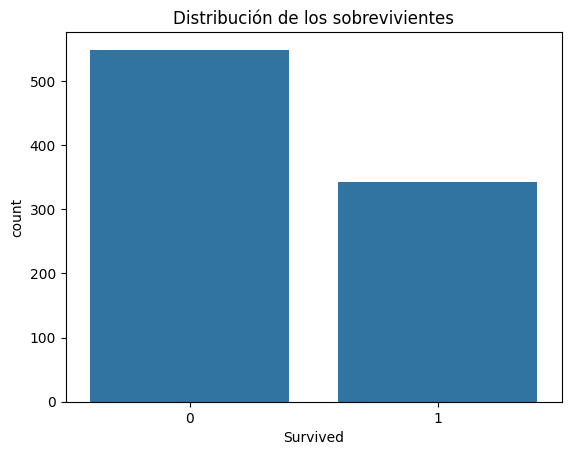

In [8]:
# ------------------------------------------------------------------------------
# Visualización de la distribución de la variable objetivo
# ------------------------------------------------------------------------------

sns.countplot(x="Survived", data=data)  
# Crea un gráfico de barras que cuenta la frecuencia de cada valor en la columna 'Survived',
# mostrando cuántos pasajeros sobrevivieron y cuántos no.

plt.title("Distribución de los sobrevivientes")  
# Establece el título del gráfico para identificar claramente lo que se está visualizando.

plt.show()  
# Muestra el gráfico generado en la ventana de salida.

## Hacer nuestra hipotesis

In [9]:
data.head()
# Vuelve a mostrar las primeras filas del DataFrame para confirmar el estado actual de los datos.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# ------------------------------------------------------------------------------
# Limpieza y preprocesamiento de los datos
# ------------------------------------------------------------------------------

data = data.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)  
# Elimina columnas que se consideran irrelevantes para el análisis o que no aportan información útil
# para el modelo (por ejemplo, 'PassengerId' es solo un identificador, y 'Name', 'Ticket' y 'Cabin'
# pueden no tener un impacto directo en la predicción).

data.head()  
# Verifica el DataFrame tras la eliminación de las columnas innecesarias.

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [11]:
data.info()
# Revisa la información del DataFrame para confirmar la eliminación de columnas y comprobar la presencia de valores nulos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [12]:
# Creo que puedo completar la edad con alguna métrica estadistica
# Media, Mediana, Moda

# ------------------------------------------------------------------------------
# Tratamiento de valores nulos en el dataset
# ------------------------------------------------------------------------------

# Relleno de valores nulos en la columna "Age"
# Se opta por la mediana ya que es una medida robusta frente a valores atípicos.
data["Age"].fillna(data['Age'].median(), inplace=True)  
# Reemplaza los valores faltantes en "Age" con la mediana de la columna.
data.info()  
# Confirma que la columna "Age" ya no contiene valores nulos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [13]:
# Relleno de valores nulos en la columna "Embarked"
# Se utiliza la moda, ya que es el valor que más se repite y puede representar adecuadamente la mayoría.
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)  
# Reemplaza los valores nulos en "Embarked" con el valor más frecuente (moda).
data.info()  
# Verifica nuevamente que los valores nulos han sido tratados correctamente.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [14]:
data.head()
# Muestra las primeras filas para confirmar visualmente los cambios realizados.

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [15]:
# ------------------------------------------------------------------------------
# Transformación de variables categóricas en variables numéricas
# ------------------------------------------------------------------------------

data = pd.get_dummies(data, columns=['Sex', "Embarked"], drop_first=True)  
# Convierte las columnas categóricas 'Sex' y 'Embarked' en variables dummy (0 o 1).
# El parámetro drop_first=True elimina una de las categorías para evitar la trampa de las variables ficticias (dummy variable trap).
data.head()  
# Muestra el DataFrame después de la transformación para confirmar la creación de las nuevas columnas.

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Experimento

In [16]:
# ------------------------------------------------------------------------------
# Preparación de los datos para el modelo
# ------------------------------------------------------------------------------

# Definición de la variable objetivo (target)
y = data['Survived']  
# 'Survived' es la variable que queremos predecir (si el pasajero sobrevivió o no).
y.head()  
# Muestra las primeras entradas de la variable objetivo.

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [17]:
# Definición de las variables predictoras (features)
X = data.drop('Survived', axis=1)  
# Se asignan todas las columnas excepto 'Survived' a la variable X, que contendrá las características del modelo.

In [18]:
# División del dataset en conjunto de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)  
# Divide los datos en 70% para entrenamiento y 30% para prueba. El parámetro random_state garantiza
# la reproducibilidad de la división.
X_train  
# (Esta línea muestra el contenido de X_train, útil para inspección en un entorno interactivo)

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
124,1,54.0,0,1,77.2875,1,0,1
141,3,22.0,0,0,7.7500,0,0,1
21,2,34.0,0,0,13.0000,1,0,1
650,3,28.0,0,0,7.8958,1,0,1
331,1,45.5,0,0,28.5000,1,0,1
...,...,...,...,...,...,...,...,...
400,3,39.0,0,0,7.9250,1,0,1
118,1,24.0,0,1,247.5208,1,0,0
701,1,35.0,0,0,26.2875,1,0,1
206,3,32.0,1,0,15.8500,1,0,1


In [19]:
# ------------------------------------------------------------------------------
# Escalado de las variables predictoras
# ------------------------------------------------------------------------------

scaler = StandardScaler()  
# Crea una instancia del escalador que normaliza los datos para que tengan media 0 y desviación estándar 1.
X_train_escalada = scaler.fit_transform(X_train)  
# Ajusta el escalador a los datos de entrenamiento y transforma esos datos.
X_test_escalada = scaler.transform(X_test)  
# Transforma el conjunto de prueba usando el mismo escalador ajustado, para asegurar coherencia en el escalado.
X_train_escalada  
# (Esta línea muestra el conjunto de entrenamiento escalado)

array([[-1.53154368,  1.85006945, -0.49352622, ...,  0.76501093,
        -0.30806386,  0.62996904],
       [ 0.83314458, -0.55828811, -0.49352622, ..., -1.30717086,
        -0.30806386,  0.62996904],
       [-0.34919955,  0.34484597, -0.49352622, ...,  0.76501093,
        -0.30806386,  0.62996904],
       ...,
       [-1.53154368,  0.42010715, -0.49352622, ...,  0.76501093,
        -0.30806386,  0.62996904],
       [ 0.83314458,  0.19432363,  0.45838349, ...,  0.76501093,
        -0.30806386,  0.62996904],
       [-1.53154368,  0.11906245, -0.49352622, ...,  0.76501093,
        -0.30806386,  0.62996904]])

In [20]:
# ------------------------------------------------------------------------------
# Creación y entrenamiento del modelo de regresión logística
# ------------------------------------------------------------------------------

modelo = LogisticRegression(random_state=5)  
# Instancia el modelo de regresión logística. Se define una semilla (random_state) para que los resultados sean reproducibles.
modelo.fit(X_train_escalada, y_train)  
# Entrena el modelo utilizando el conjunto de entrenamiento escalado y las etiquetas correspondientes.

# ------------------------------------------------------------------------------
# Evaluación del modelo
# ------------------------------------------------------------------------------

y_predecida = modelo.predict(X_test_escalada)  
# Realiza la predicción de las clases en el conjunto de prueba escalado.
y_predecida  
# Muestra las predicciones obtenidas.

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1])

In [21]:
y_proba = modelo.predict_proba(X_test_escalada)[:, 1]  
# Calcula la probabilidad de que cada muestra pertenezca a la clase 1 (sobrevivió).
y_proba  
# Muestra las probabilidades predichas.

array([0.13856239, 0.11763723, 0.06957776, 0.08600988, 0.07659378,
       0.22571865, 0.922318  , 0.0557101 , 0.96737603, 0.0550506 ,
       0.14144622, 0.4978084 , 0.08062272, 0.82591508, 0.11607923,
       0.81787997, 0.07316788, 0.62539522, 0.11610125, 0.2450845 ,
       0.09821987, 0.70954723, 0.8644251 , 0.64229237, 0.59043633,
       0.07664875, 0.30077297, 0.31540011, 0.11250297, 0.2358527 ,
       0.11965733, 0.65742178, 0.84537143, 0.13856239, 0.87856376,
       0.49004019, 0.27454315, 0.32261103, 0.11248081, 0.08723431,
       0.03114338, 0.857211  , 0.08158417, 0.22202108, 0.05515347,
       0.08472475, 0.88321878, 0.75650225, 0.29993556, 0.03429909,
       0.35045542, 0.77835009, 0.89729425, 0.084657  , 0.12292986,
       0.06958639, 0.25175081, 0.02810357, 0.11763645, 0.79591123,
       0.47459797, 0.33477373, 0.57325869, 0.11050863, 0.70959909,
       0.12366555, 0.0873475 , 0.16740463, 0.50513377, 0.04374186,
       0.82815509, 0.08723431, 0.84731882, 0.09596242, 0.67394

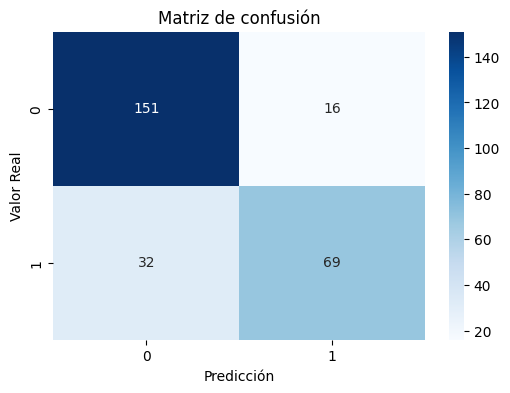

In [22]:
matriz = confusion_matrix(y_test, y_predecida)  
# Calcula la matriz de confusión comparando las etiquetas reales (y_test) con las predichas (y_predecida).

# Visualización de la matriz de confusión
plt.figure(figsize=(6, 4))  
# Define el tamaño de la figura para la visualización.
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', cbar=True)  
# Crea un heatmap de la matriz de confusión, mostrando los números enteros (fmt='d') y utilizando una escala de colores azul.
plt.title("Matriz de confusión")  
# Establece el título del gráfico.
plt.xlabel("Predicción")  
# Etiqueta el eje X indicando que representa las predicciones del modelo.
plt.ylabel('Valor Real')  
# Etiqueta el eje Y indicando que representa los valores reales del dataset.
plt.show()  
# Muestra el gráfico generado.

In [23]:
print(classification_report(y_test, y_predecida))  
# Imprime un reporte de clasificación que incluye métricas importantes como precisión, recall, F1-score y soporte,
# proporcionando una evaluación detallada del rendimiento del modelo.

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       167
           1       0.81      0.68      0.74       101

    accuracy                           0.82       268
   macro avg       0.82      0.79      0.80       268
weighted avg       0.82      0.82      0.82       268

